<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module2/Uniform_Cost_Search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# https://docs.python.org/3/library/heapq.html

import heapq

def UCS(graph, root, costs, goal=None):

    # Priority queue (min-heap) where each element is (cost, node)
    pq = [(0, root)]  # Start with root at cost 0
    visited = {}  # Dictionary to track the minimum cost to reach each node

    while pq:
        # Pop the node with the lowest cost
        current_cost, vertex = heapq.heappop(pq)

        # If this node has already been visited with a cheaper path, skip it
        if vertex in visited and visited[vertex] <= current_cost:
            continue

        # Mark this node as visited with the current cost
        visited[vertex] = current_cost
        print(f"Visiting: {vertex}, Cost: {current_cost}")

        # If we found the goal, we can stop
        if vertex == goal:
            print(f"Goal {goal} found with cost: {current_cost}")
            break

        # Explore neighbors
        for neighbor in graph[vertex]:
            new_cost = current_cost + costs.get((vertex, neighbor), 1)  # Default cost is 1 if not given
            if neighbor not in visited or new_cost < visited.get(neighbor, float('inf')):
                heapq.heappush(pq, (new_cost, neighbor))  # Push with the new cost

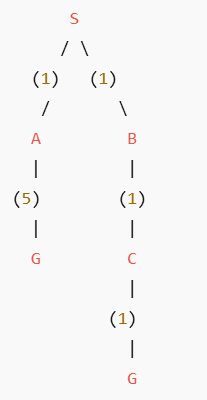

In [19]:
# Simpler graph as dsicussed in class
graph = {
    'S': ['A', 'B'],
    'A': ['G'],
    'B': ['C'],
    'C': ['G'],
}

# Cost dictionary for edges
costs = {
    ('S', 'A'): 1, ('S', 'B'): 1,
    ('A', 'G'): 5,
    ('B', 'C'): 1,
    ('C', 'G'): 1,
}

In [20]:
# Example usage
UCS(graph, 'S', costs, goal='G')

Visiting: S, Cost: 0
Visiting: A, Cost: 1
Visiting: B, Cost: 1
Visiting: C, Cost: 2
Visiting: G, Cost: 3
Goal G found with cost: 3
